بسم الله

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/the-worlds-500-most-powerful-businessmen/top rich2024.csv')

df.head()

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
0,1,Elon Musk,$447B,+$62.8B,+$218B,United States,Technology
1,2,Jeff Bezos,$249B,+$4.65B,+$72.1B,United States,Technology
2,3,Mark Zuckerberg,$224B,+$4.58B,+$95.5B,United States,Technology
3,4,Larry Ellison,$198B,+$1.63B,+$75.3B,United States,Technology
4,5,Bernard Arnault,$181B,+$1.32B,-$26.4B,France,Consumer


In [3]:
df.tail()

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
495,496,Igor Bukhman,$6.41B,-$27.0M,+$2.86B,Israel,Technology
496,497,Dmitry Bukhman,$6.41B,-$27.0M,+$2.86B,Israel,Technology
497,498,Renate Reimann-Haas,$6.38B,$0,+$2.35B,Austria,Retail
498,499,Matthias Reimann-Andersen,$6.38B,$0,+$2.35B,Austria,Retail
499,500,Stefan Reimann-Andersen,$6.38B,$0,+$2.35B,Austria,Retail


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              500 non-null    int64 
 1    Name             500 non-null    object
 2   Total net worth   500 non-null    object
 3   $ Last change     500 non-null    object
 4   $ YTD change      500 non-null    object
 5   Country / Region  500 non-null    object
 6   Industry          500 non-null    object
dtypes: int64(1), object(6)
memory usage: 27.5+ KB


In [5]:
df.sample()

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
60,61,Vladimir Lisin,$29.7B,-$113M,+$5.80B,Russian Federation,Industrial


<Axes: >

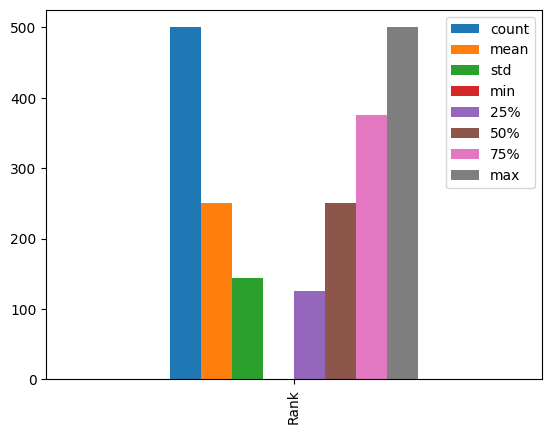

In [6]:
df.describe().T.plot(kind='bar')

In [7]:
df.sample()

,Rank,Name,Total net worth,$ Last change,$ YTD change,Country / Region,Industry
464,465,Carl Douglas,$6.77B,+$14.0M,+$242M,Sweden,Diversified


In [8]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,500.0,NaN,NaN,NaN,250.5,144.481833,1.0,125.75,250.5,375.25,500.0
Name,500,500,Elon Musk,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total net worth,500,318,$12.4B,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$ Last change,500,373,$0,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$ YTD change,500,412,+$1.01B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country / Region,500,48,United States,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,500,14,Technology,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns.to_list()

['Rank',
 ' Name',
 'Total net worth ',
 '$ Last change ',
 '$ YTD change',
 'Country / Region',
 'Industry']

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Rank                0
 Name               0
Total net worth     0
$ Last change       0
$ YTD change        0
Country / Region    0
Industry            0
dtype: int64

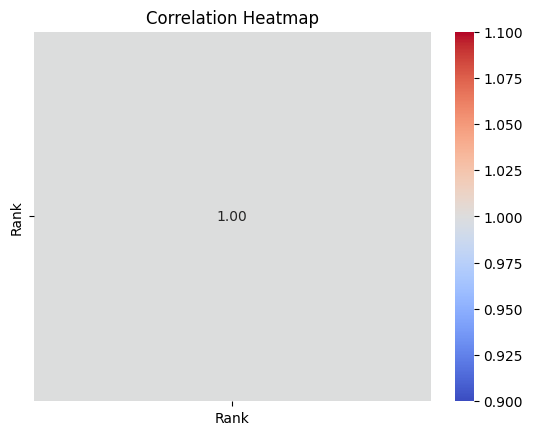

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
df['Country / Region'].nunique()


48

In [14]:
df['Country / Region'].unique()


array(['United States', 'France', 'Spain', 'India', 'Mexico', 'Canada',
       'China', 'Japan', 'Germany', 'Hong Kong', 'Italy', 'Brazil',
       'Russian Federation', 'Chile', 'Indonesia', 'Israel', 'Nigeria',
       'Switzerland', 'Monaco', 'Australia', 'Philippines', 'Austria',
       'Greece', 'United Kingdom', 'Sweden', 'Malaysia', 'Saudi Arabia',
       'Thailand', 'Singapore', 'Colombia', 'Czech Republic',
       'South Africa', 'Netherlands', 'Taiwan', 'New Zealand', 'Cyprus',
       'Ireland', 'Norway', 'Liechtenstein', 'Cayman Islands',
       'United Arab Emirates', 'Egypt', 'Korea, Republic of', 'Denmark',
       'Argentina', 'Georgia', 'Kazakhstan', 'Isle of Man'], dtype=object)

In [15]:
top_country_richest =df['Country / Region'].value_counts()

In [16]:
top_country_richest.head(10)

Country / Region
United States         191
China                  55
India                  26
Russian Federation     25
Germany                19
United Kingdom         15
Hong Kong              14
Canada                 13
France                 12
Australia              11
Name: count, dtype: int64

In [17]:
top_country_richest.head(10)

Country / Region
United States         191
China                  55
India                  26
Russian Federation     25
Germany                19
United Kingdom         15
Hong Kong              14
Canada                 13
France                 12
Australia              11
Name: count, dtype: int64

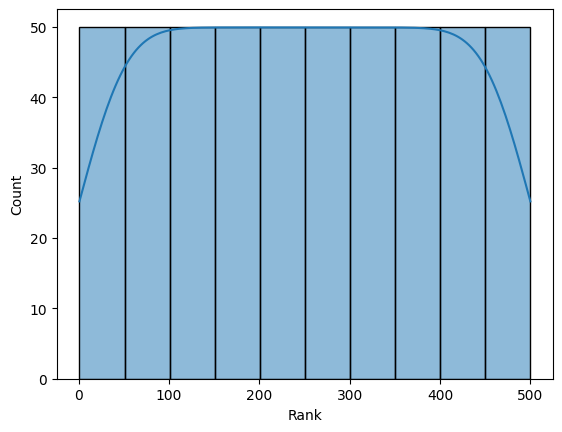

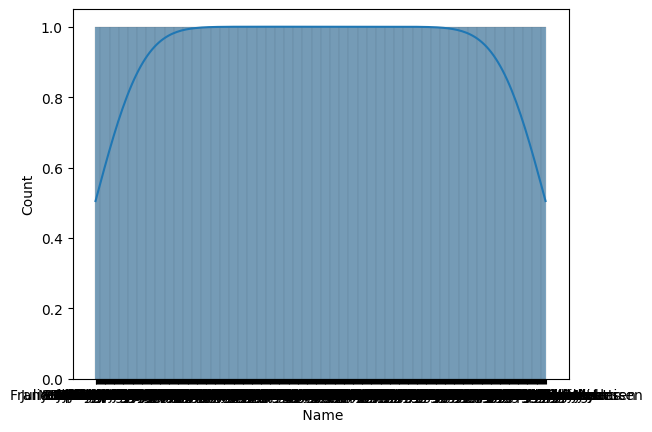

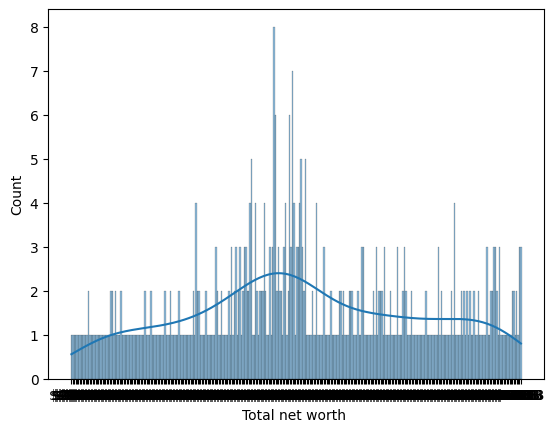

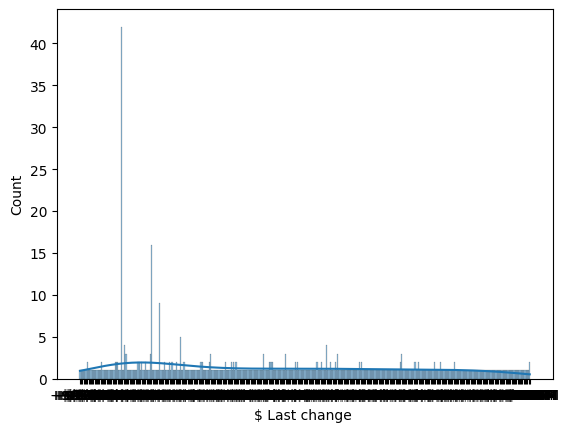

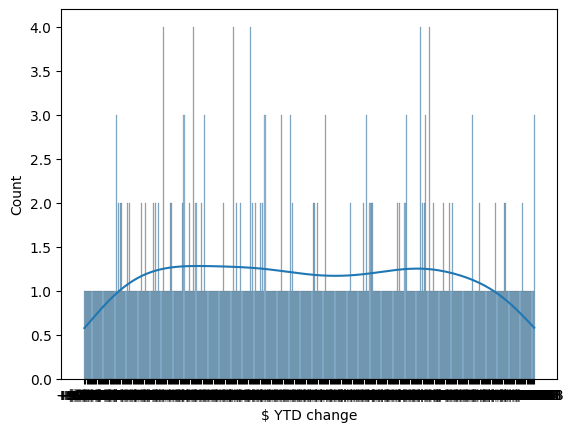

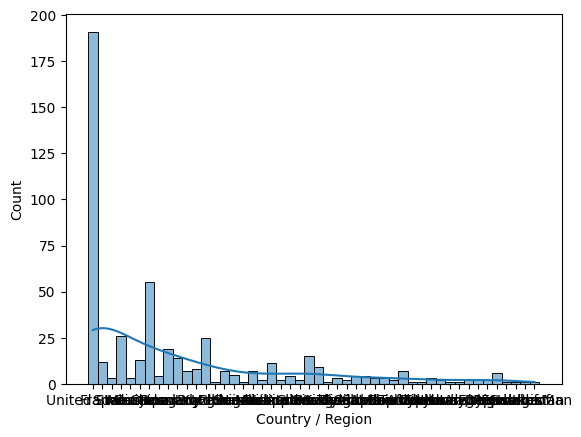

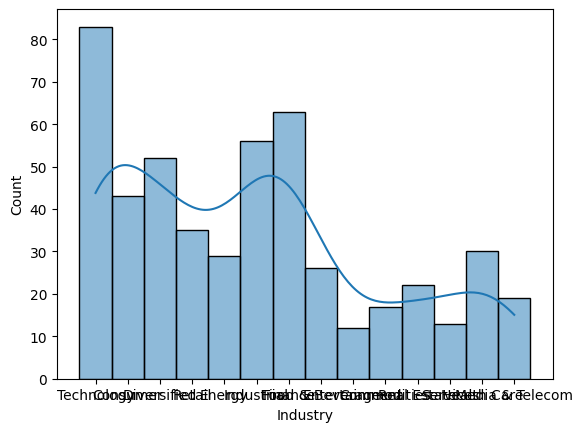

In [18]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

In [19]:
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns =['Rank',
 ' Name',
 'Total net worth ',
 '$ Last change ',
 '$ YTD change',
 'Country / Region',
 'Industry']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )
            
            # Show the figure
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")


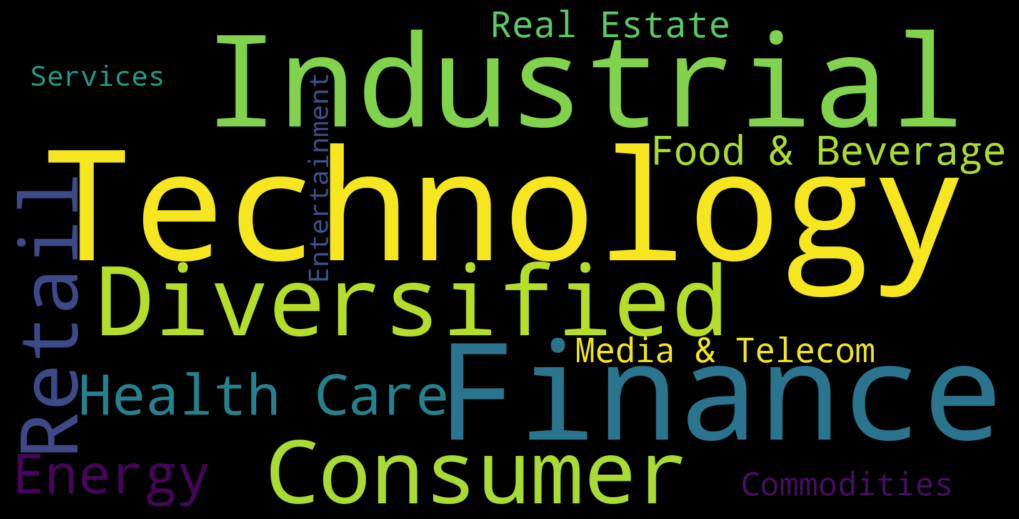

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["Industry"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()